In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show Code"></form>''')

In [2]:
# Import useful libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from collections import defaultdict

import matplotlib as mpl
import seaborn as sns

sns.set(style ='white',font_scale=1.25)

%matplotlib inline

In [3]:
housing_raw = pd.read_csv('../data/01-House-Price/train.csv',index_col='Id')
housing = housing_raw.copy()
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

## **Numerical Data**

In [4]:
y = housing.SalePrice
features = defaultdict(list)
for feat in housing.columns:
    if housing[feat].dtypes == 'object':
        features['cat'].append(feat)
    elif feat != 'object' and feat != 'SalePrice':
        features['num'].append(feat)

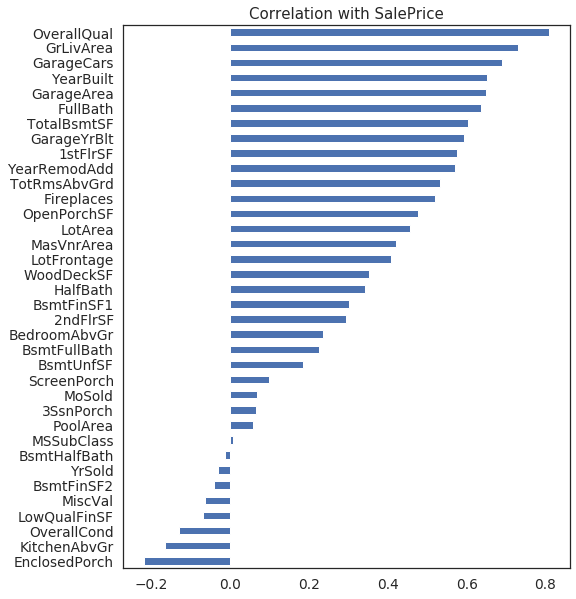

In [5]:
housing_num = housing[features['num']]
housing_num.corrwith(y,method='spearman').sort_values(ascending=True).plot.barh(figsize=(8,10),title = 'Correlation with SalePrice')

In [6]:
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

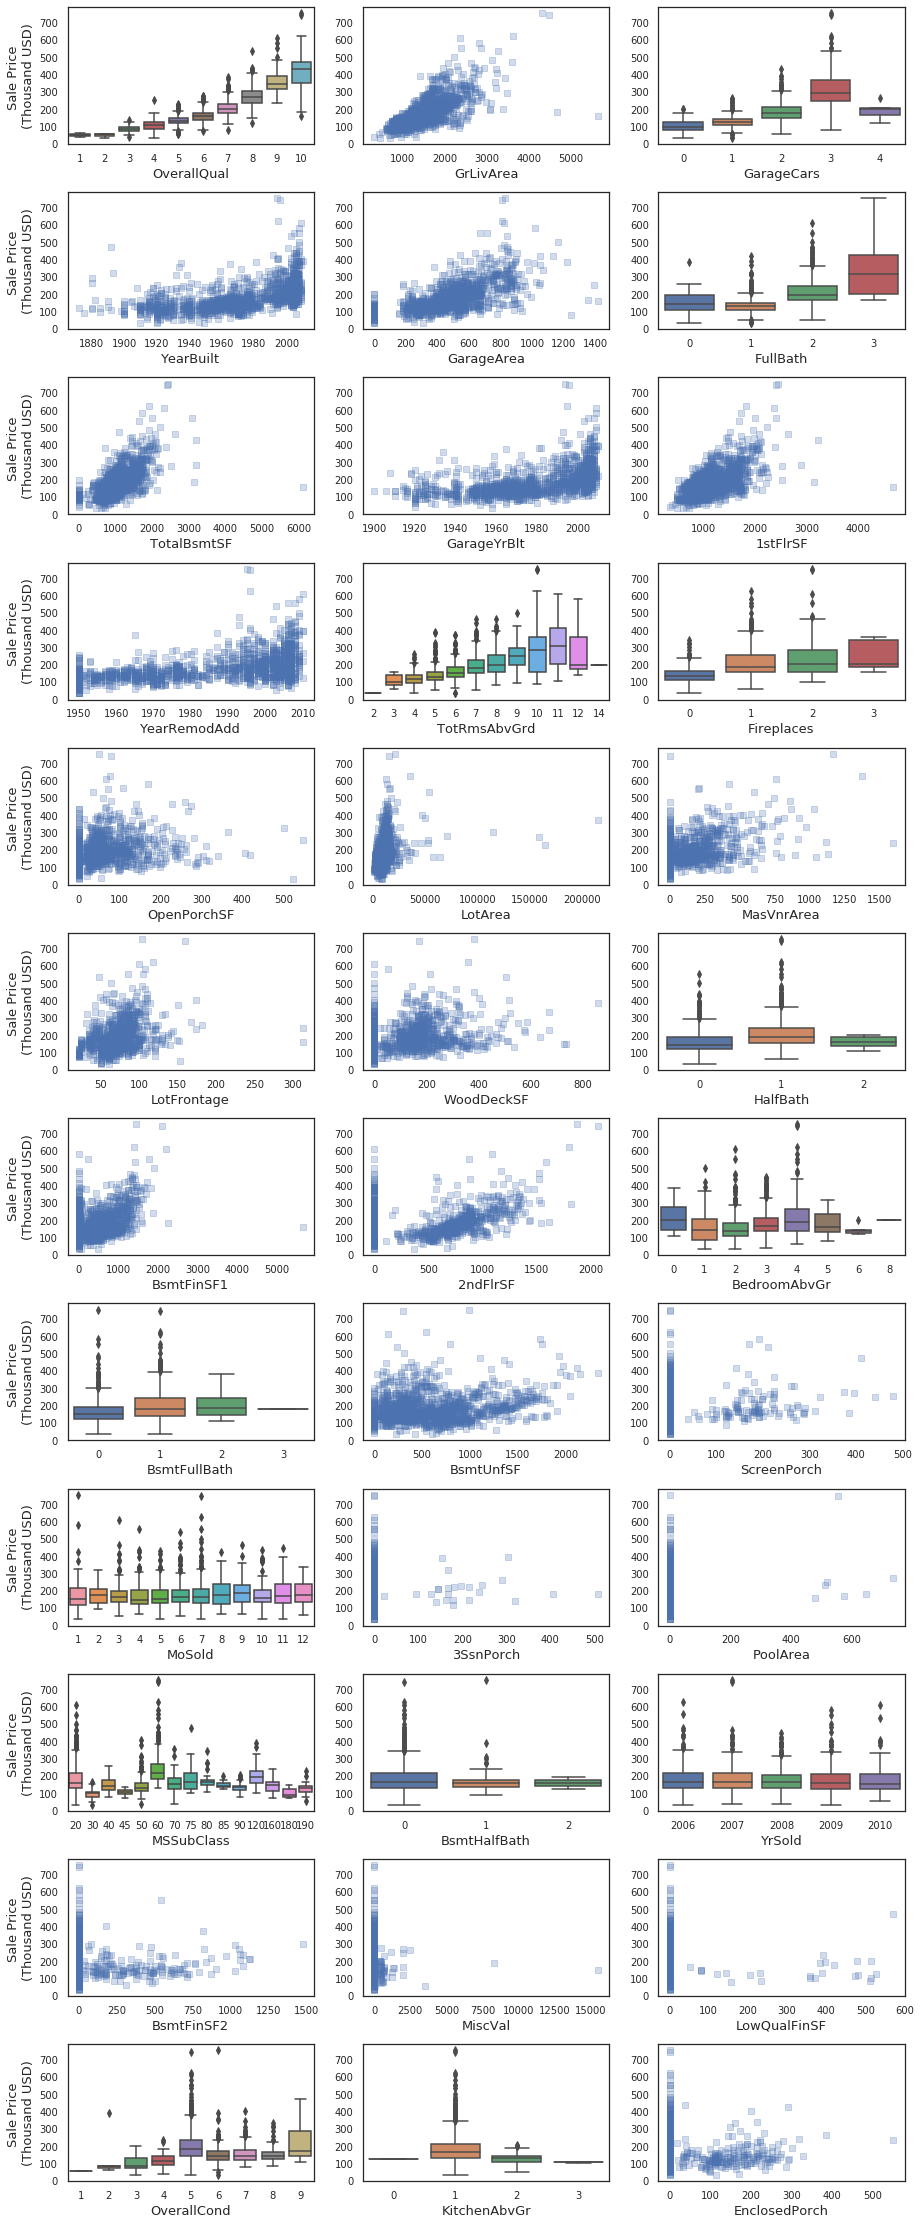

In [8]:
k_cols = 3
fig, axes = plt.subplots(ncols=k_cols,nrows=12,figsize=(15,40))
fig.subplots_adjust(hspace=0.35)
axes = axes.flatten()
yticks = np.arange(0,housing['SalePrice'].max()+1,100000)
yticklabs = [int(num) for num in np.arange(0,housing['SalePrice'].max()+1,100000)/1000]
for ii, feat in enumerate(housing_num.corrwith(y,method='spearman').sort_values(ascending=False).index):
    if feat in 'OverallQual MSSubClass OverallCond BsmtFullBath \
                BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr \
                Fireplaces GarageCars MoSold YrSold TotRmsAbvGrd'.split():
        
        if feat not in features['discrete']:
            features['discrete'].append(feat)
        sns.boxplot(x=feat,y='SalePrice',data=housing,ax=axes[ii])
    else:
        if feat not in features['cont']:
            features['cont'].append(feat)
        axes[ii].scatter(x=housing[feat],y=y,alpha=0.25,marker='s')
        
    if ii % k_cols != 0:
        axes[ii].set_ylabel('')
    else:
        axes[ii].set_ylabel('Sale Price \n(Thousand USD)',fontsize=13)

    axes[ii].set_yticks(ticks=yticks)
    axes[ii].set_yticklabels(labels=yticklabs)
    axes[ii].set_xlabel(feat,fontsize=13)
    

Comments/Observation:
- Following numercial features showed strong positve correlation with the sale price (listed in descending of their correlation strength with sale price).
    - Overall Quality (**OverallQual**), 
    - Above grade living area (**GrLivArea**)
    - Total garage car capacity (**GarageCars**)
    - Year built (**YrBuilt**)
    - Garage area (**GarageArea**)
    - Number of full bathrooms above grade (**FullBath**)
    - Total area of the basement in sq. ft. (**TotalBsmtSF**)
    - Garage year built (**GarageYrBlt**)
    - Area of the first floor (**1stFlrSF**)
    - Year whe the house of remodeled (**YearRemodAdd**)
    - Total rooms above grade (**TotRmsAbvGrd**)
    - Number of fireplaces (**FirePlaces**)
    - Open porch area in square feet (**OpenPorchSF**)
    - Lot Area (**LotArea**)
    - Masonry veneer area in square feet (**MasVnrArea**)
    - Linear feet of street connected to property (**LotFrontage**)

## **Categorical Data**

Anova on every categorical feature

In [25]:
from scipy import stats

In [26]:
housing_cat = housing[features['cat']]

In [27]:
for c in features['cat']:
    housing_cat[c] = housing_cat[c].astype('category')
    if housing_cat[c].isnull().any():
        housing_cat[c] = housing_cat[c].cat.add_categories(['MISSING'])
        housing_cat[c] = housing_cat[c].fillna('MISSING')

/home/climbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/climbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/climbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

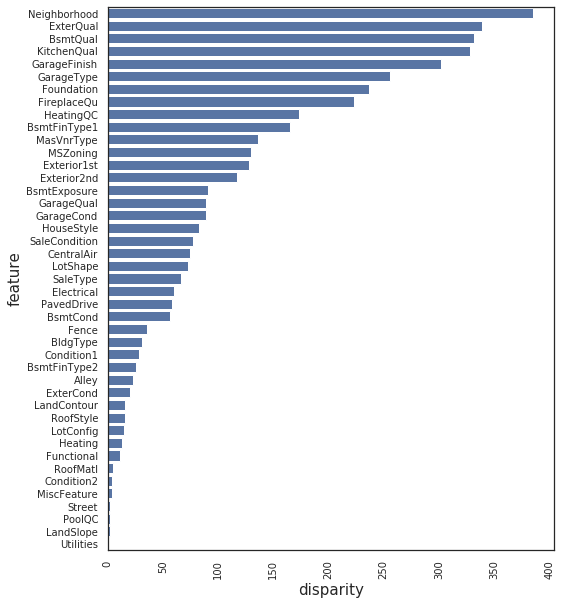

In [55]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = features['cat']
    pvals = []
    for c in features['cat']:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.kruskal(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval').reset_index(drop=True)

a = anova(housing_cat.join(y))
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize=(8,10))
sns.barplot(x='disparity',y='feature',data=a,color=sns.color_palette(n_colors=1)[0])
x=plt.xticks(rotation=90)

The above bar plot shows influence of categorical features on the sale price. Features with higher disparity have higher influence on the sale price.

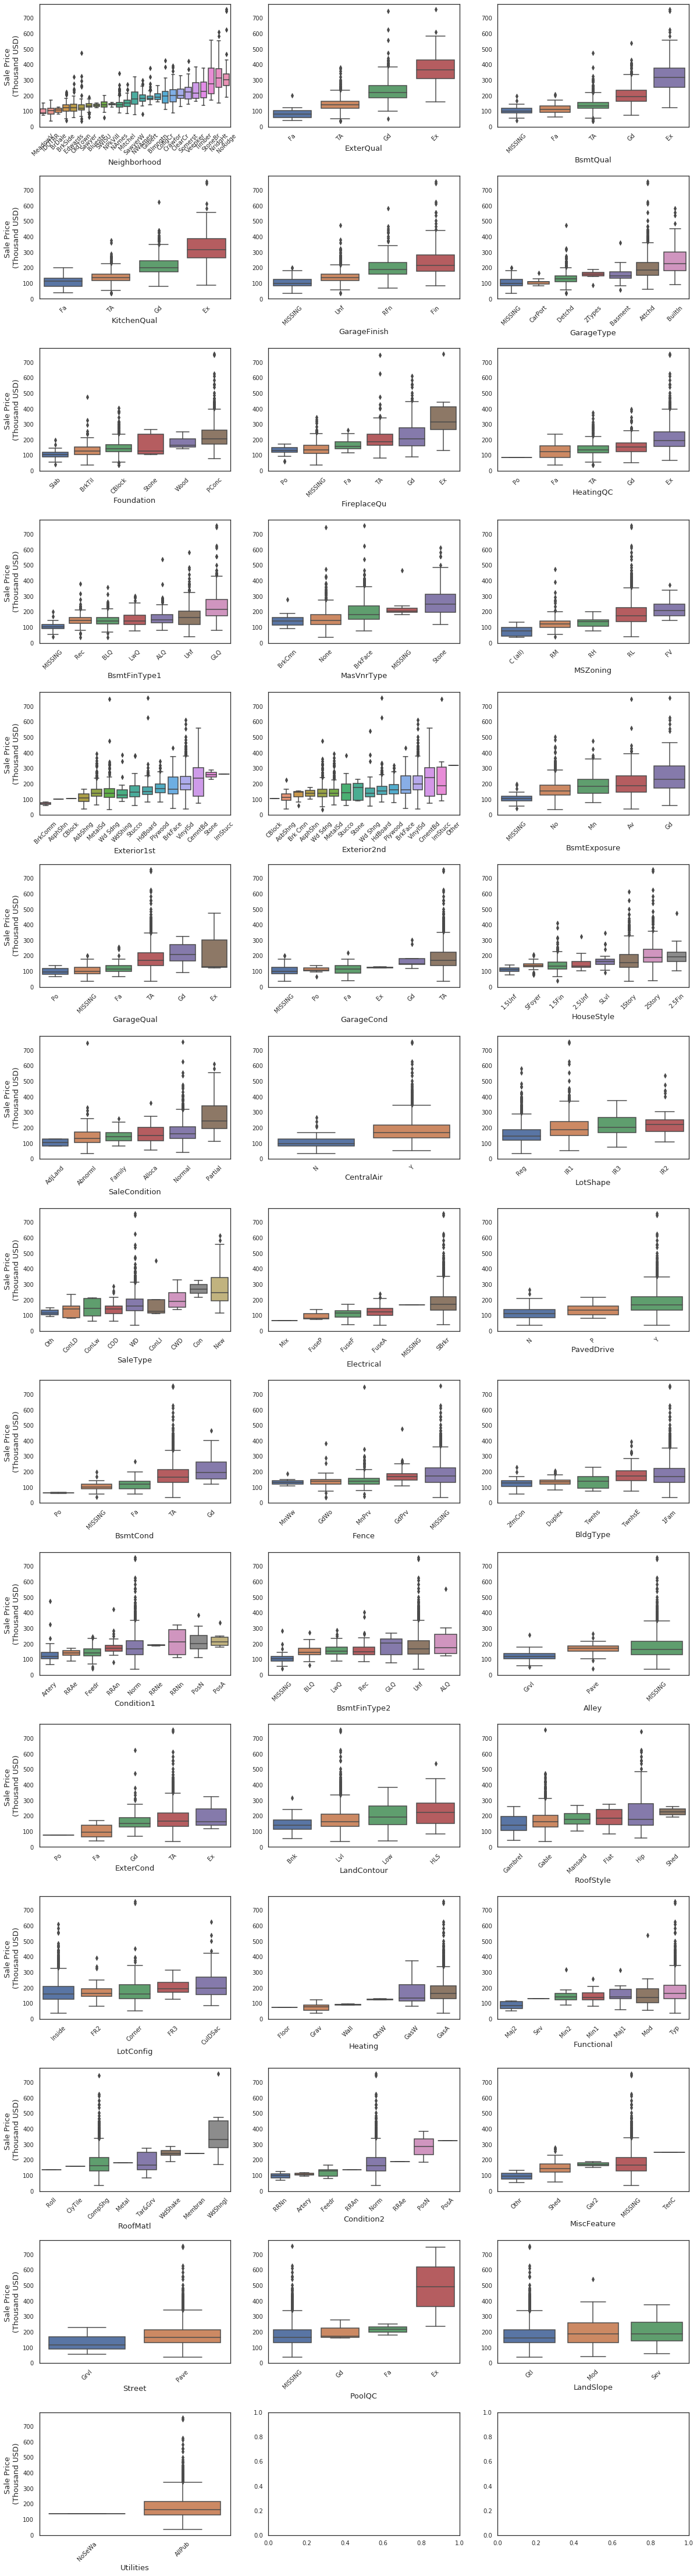

In [106]:
k_cols = 3
fig, axes = plt.subplots(ncols=k_cols,nrows=15,figsize=(20,80))
fig.subplots_adjust(hspace=0.4)
axes = axes.flatten()
yticks = np.arange(0,housing['SalePrice'].max()+1,100000)
yticklabs = [int(num) for num in np.arange(0,housing['SalePrice'].max()+1,100000)/1000]
for ii, feat in enumerate(a.feature):
    order = y.groupby(housing_cat[feat]).mean().sort_values().index.to_list()
    sns.boxplot(x=feat,y='SalePrice',data=housing_cat.join(y),ax=axes[ii],order=order)
    
    if ii % k_cols != 0:
        axes[ii].set_ylabel('')
    else:
        axes[ii].set_ylabel('Sale Price \n(Thousand USD)',fontsize=13)

    axes[ii].set_yticks(ticks=yticks)
    axes[ii].set_yticklabels(labels=yticklabs)
    axes[ii].set_xlabel(feat,fontsize=13)
    
    for tick in axes[ii].get_xticklabels():
        tick.set_rotation(45)
    

In [5]:
from collections import defaultdict

attributes = defaultdict(list)

for col in housing.columns:
    if 'Yr' in col or 'Year' in col or 'Mo' in col:
        attributes['temporal'].append(col)

In [6]:
attributes['temporal']

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [7]:
palette = sns.color_palette()

### **In what year highest number of houses were built?**

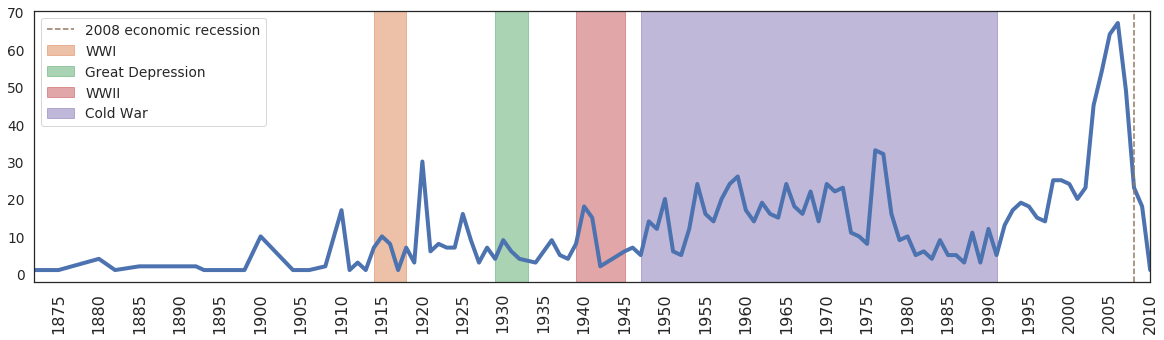

In [8]:
plt.figure(figsize=(20,5))
ax = housing.YearBuilt.value_counts().sort_index().plot(linewidth=4,label = '')
_=plt.axvspan(xmin=1914,xmax=1918,color=palette[1],alpha=0.5,label = 'WWI')
_=plt.axvspan(xmin=1929,xmax=1933,color=palette[2],alpha=0.5,label ='Great Depression')
_=plt.axvspan(xmin=1939,xmax=1945,color=palette[3],alpha=0.5,label ='WWII')
_=plt.axvspan(xmin=1947,xmax=1991,color=palette[4],alpha=0.5,label='Cold War')
_=plt.axvline(x=2008,linestyle='--', label = '2008 economic recession',color=palette[5])
_=plt.xticks(np.arange(1875,2011,5),rotation = 90,fontsize=16)
_=plt.legend()

Comments/Observation:

Certain years are have been shaded to highlight important historic events that took place during those times; it's just meant to give a histrical context.

- After 1990 (which is also the time when Cold War ended and United States' economy boomed), we observe an increase in the number of houses being built in Ames, IA.
- However in 2006, the number peaked and started falling steeply. 

### **Are new houses more expensive? (it obvious, but lets visualize it)**

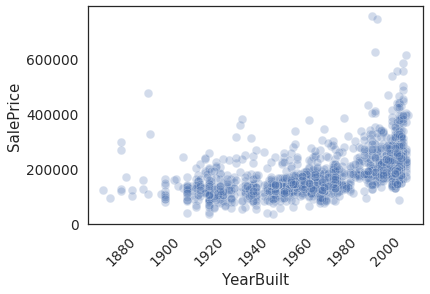

In [9]:
sns.scatterplot(x='YearBuilt',y='SalePrice',data=housing,alpha=0.25,palette=palette[0],s=75)
_=plt.xticks(rotation=45)

Comments/Observation:
- Newer houses are more expensive. However, relationships is not linear.

### **Do recently remodeled houses cost more?**

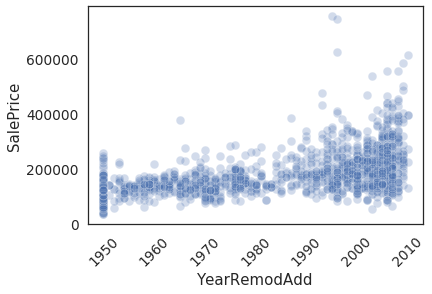

In [10]:
sns.scatterplot(x='YearRemodAdd',y='SalePrice',data=housing,alpha=0.25,palette=palette[0],s=75)
_=plt.xticks(rotation=45)

Comments/Observation:
- Recently remodeled houses tend to cost more.

### **Generally after how many years is a house remodeled?**

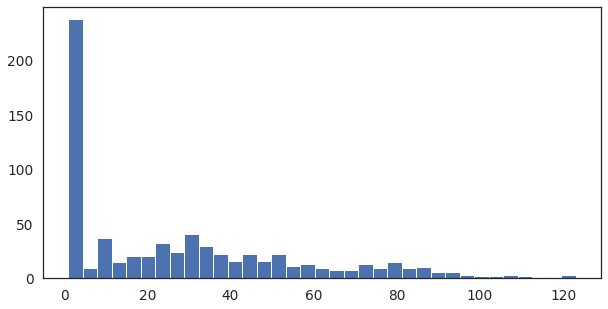

In [11]:
remod_after = housing.YearRemodAdd - housing.YearBuilt
remod_after = remod_after[remod_after > 0]
plt.figure(figsize=(10,5))
_=plt.hist(remod_after,bins=35)

Comments/Observation:
- Most houses are remodeled within the first couple of years after they are built.

### **In which year most of the houses were sold?**

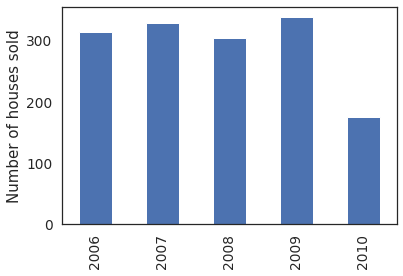

In [12]:
ax = housing.YrSold.value_counts().sort_index().plot.bar()
_=plt.ylabel('Number of houses sold')

Comments/Observation:

- All houses were sold between 2006 and 2010 (highest in 2009). 
- Recall this is also the time when number of houses being built declined. 

### **Is there a particular time of the year when people choose to buy a house?**

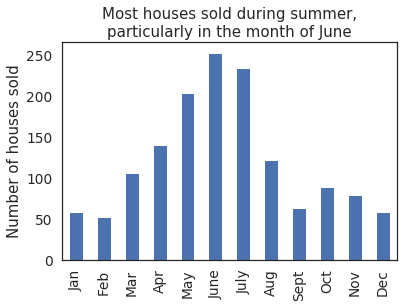

In [13]:
ax = housing.MoSold.value_counts().sort_index().plot.bar(title = 'Most houses sold during summer,\nparticularly in the month of June')
_=plt.xticks(ticks=ax.get_xticks(),labels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
_=plt.ylabel('Number of houses sold')

Comments/Observation:
- Most houses are bougth during the summer, highest being in the month of June.

### **Do house prices vary across the year?**

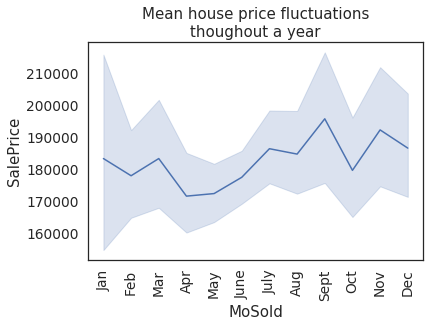

In [14]:
ax = sns.lineplot(x='MoSold',y='SalePrice',data=housing,color=palette[0],)
_=plt.xticks(np.arange(1,13),labels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
_=plt.title('Mean house price fluctuations\nthoughout a year')
_=plt.xticks(rotation=90)

Comments/Observation:
- House prices seem to fall by a few thousand dollars (~$10,000 dollars) by the end of winter (in Apr) and start rising back up by May. This explains why most houses are bought during summer.

### **How does size of the housing property influence the house price?**

Features like,
- LotArea
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSf
- GrlivArea
- TotRmsAbvGrd
- GarageArea
- PoolArea

are indicative of the housing property size.

Lets check correlations of these with each other and the SalePrice.

In [15]:
for feat in ['LotArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','TotRmsAbvGrd','GarageArea','PoolArea']:
    attributes['size'].append(feat)

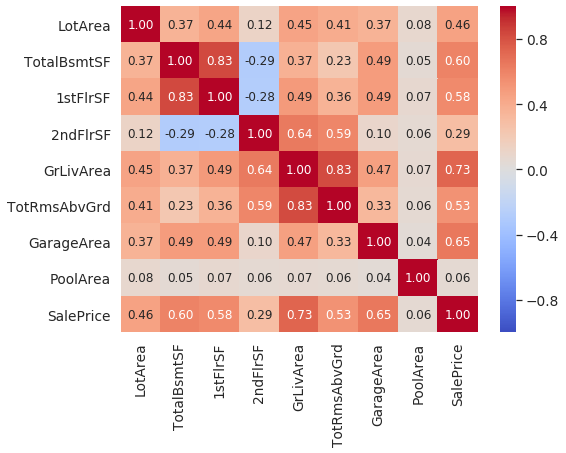

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(housing[attributes['size']+['SalePrice']].corr(method='spearman'),
           vmin=-1,vmax=1,annot=True,fmt='.2f',annot_kws={'size':12},cmap='coolwarm')

Comments/Observation:

- SalePrice is highly correlate with all of the above features except PoolArea and 2ndFlrSF (very mildly correlated with 2ndFlrSf).

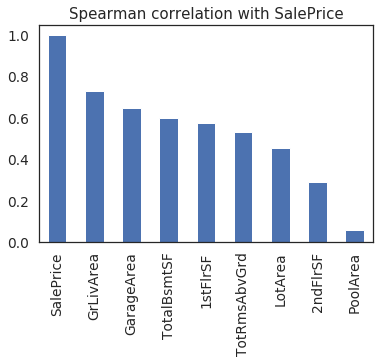

In [17]:
housing[attributes['size']+['SalePrice']].corr(method='spearman')['SalePrice'].sort_values(ascending=False).plot.bar(title='Spearman correlation with SalePrice')

Comments/Observation:

- SalePrice is most correlated with above ground living area (**GrLivArea**).

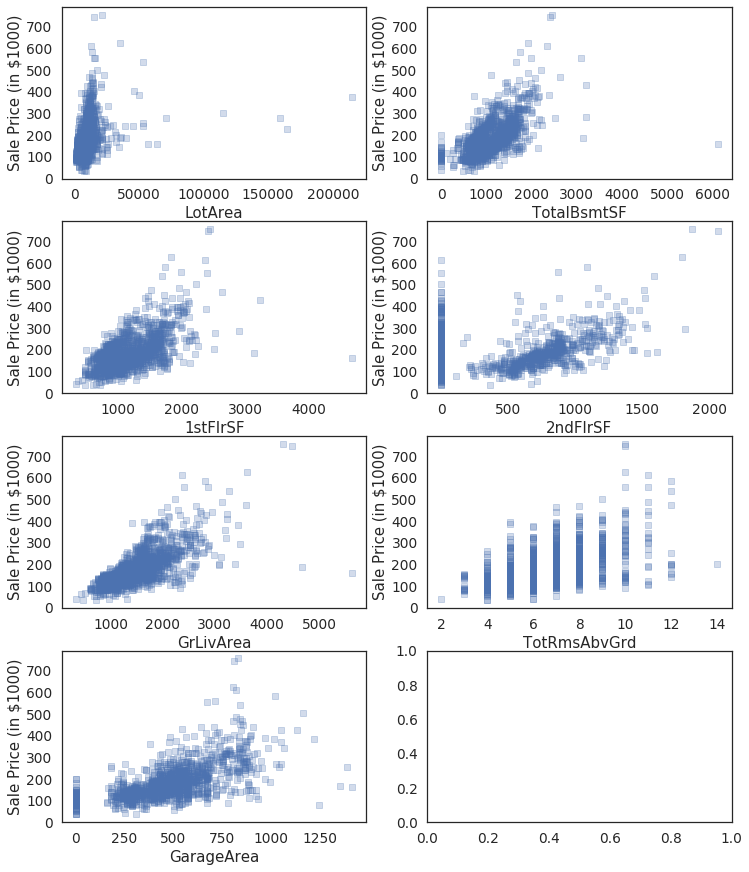

In [18]:
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(12,15))
fig.subplots_adjust(hspace=0.25)
axes = axes.flatten()
yticks = np.arange(0,housing['SalePrice'].max()+1,100000)
yticklabs = [int(num) for num in np.arange(0,housing['SalePrice'].max()+1,100000)/1000]
for ii, feat in enumerate(attributes['size']):
    if feat != 'PoolArea':
        axes[ii].scatter(x=housing[feat],
                    y=housing['SalePrice'],
                    color=palette[0],
                    marker='s',
                    alpha=0.25)
        axes[ii].set_yticks(ticks=yticks)
        axes[ii].set_yticklabels(labels=yticklabs)
        axes[ii].set_ylabel('Sale Price (in $1000)')
        axes[ii].set_xlabel(feat)

Comments/Observation:

- All of the above features related to the size of the housing property have roughly positive linear relationship with the Sale Price. 

### **Does house style influence it's sale price?**

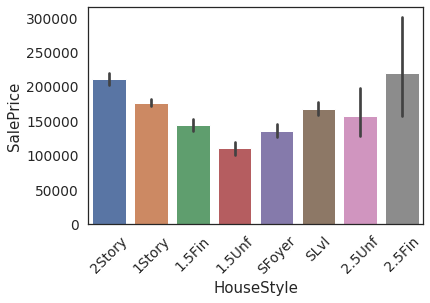

In [19]:
sns.barplot(x='HouseStyle',y='SalePrice',data=housing)
_=plt.xticks(rotation = 45)

Comments/Observation:

- Finished two and a half story (**2Story**) houses seem to have the highest average sale price. However, there is a lot of variance in its cost.

Prehaps visualizing the data points and quantiles will show a better picture.

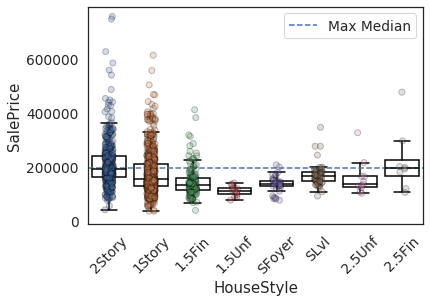

In [20]:
#plt.figure(figsize=(8,6))
sns.stripplot(x='HouseStyle',
              y='SalePrice',
              data=housing,
              alpha=0.25,
              size=6,
              edgecolor='black',
              linewidth=1)
ax = sns.boxplot(x='HouseStyle',
                 y='SalePrice',
                 data=housing,
                 flierprops = dict(markersize = 0))

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')

_=plt.axhline(y=housing.groupby('HouseStyle')['SalePrice'].median().max(), 
              linestyle='--',
              label='Max Median')
_=plt.xticks(rotation = 45)
_=plt.legend()

Comments/Observation:

- Both median and average sale prices of finished two and half story (**2.5Fin**) houses is the highest.  
- Unfurnished one and half story (**1.5Unf**) houses are the cheapest.

### **Does building type of the house influence it's sale price?**

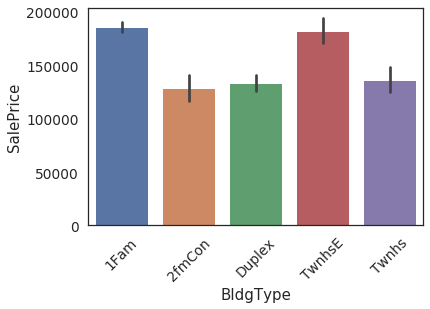

In [21]:
sns.barplot(x='BldgType',y='SalePrice',data=housing)
_=plt.xticks(rotation = 45)

Comments/Observation:
    
- Single family detached (**1Fam**) houses have the highest average sale price.

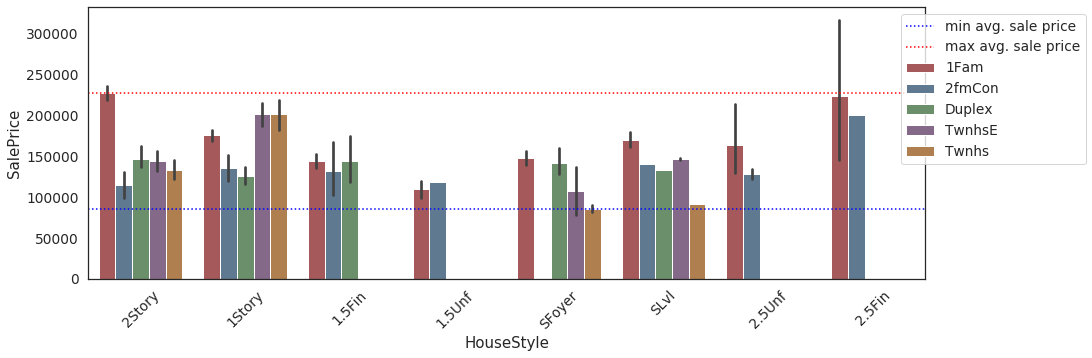

In [497]:
plt.figure(figsize=(15,5))
sns.barplot(x='HouseStyle',
            y='SalePrice',
            hue='BldgType',
            data=housing,
            palette=sns.color_palette("Set1", n_colors=5, desat=.5))
_=plt.xticks(rotation = 45)
plt.axhline(y=housing.groupby(['HouseStyle','BldgType'])['SalePrice'].mean().min(),
            linestyle = ':', 
            color='blue',
            label='min avg. sale price')
plt.axhline(y=housing.groupby(['HouseStyle','BldgType'])['SalePrice'].mean().max(),
            linestyle = ':', 
            color='red',
            label='max avg. sale price')
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))

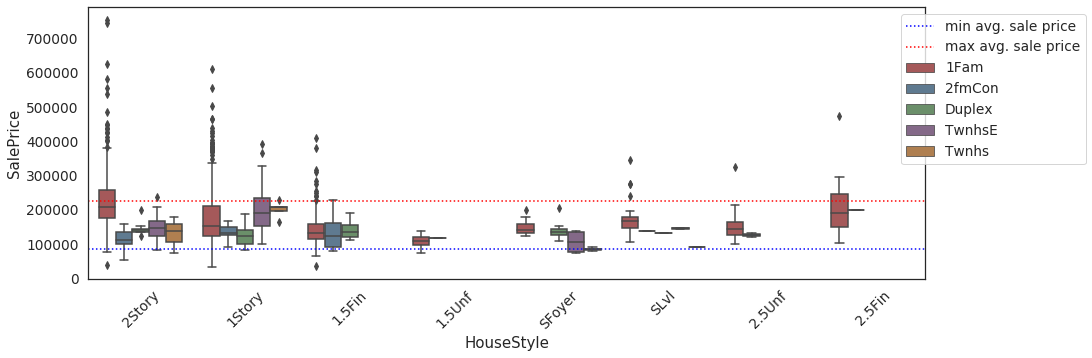

In [500]:
plt.figure(figsize=(15,5))
sns.boxplot(x='HouseStyle',
            y='SalePrice',
            hue='BldgType',
            data=housing,
            palette=sns.color_palette("Set1", n_colors=5, desat=.5))
_=plt.xticks(rotation = 45)
plt.axhline(y=housing.groupby(['HouseStyle','BldgType'])['SalePrice'].mean().min(),
            linestyle = ':', 
            color='blue',
            label='min avg. sale price')
plt.axhline(y=housing.groupby(['HouseStyle','BldgType'])['SalePrice'].mean().max(),
            linestyle = ':', 
            color='red',
            label='max avg. sale price')
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))

Conclusion: 
   - Two-story, single family detached houses have the highest avg. sale price
   - Split-foyer, townhouses (inside unit) have the lowest avg. sale price

### **Is the house price influenced by the location/zone?**

Features like MSZoning, Neighborhood, Condition1,& 2 (proximity to various landmarks) carry the location/zoning information of the houses.  

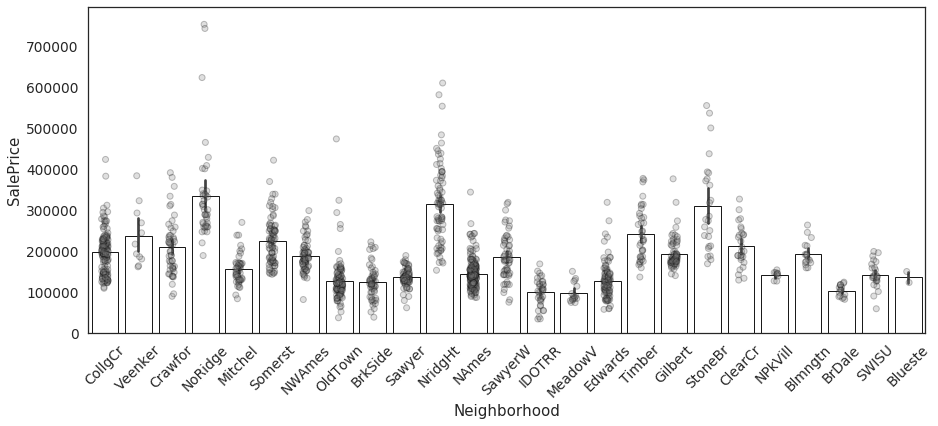

In [266]:
plt.figure(figsize=(15,6))
sns.barplot(x='Neighborhood',y='SalePrice',data=housing,color='white',edgecolor='k')
sns.stripplot(x='Neighborhood',
              y='SalePrice',
              data=housing,
              alpha=0.25,
              size=6,
              color='gray',
              edgecolor='black',
              linewidth=1)
_=plt.xticks(rotation=45)


Conclusion:
- Houses in **North Ridge (NoRidge)** neighborhood have the highest mean sale price, followed by **Northridge heights (NridgeHt)** and **Stone Brook (StoneBr)**.

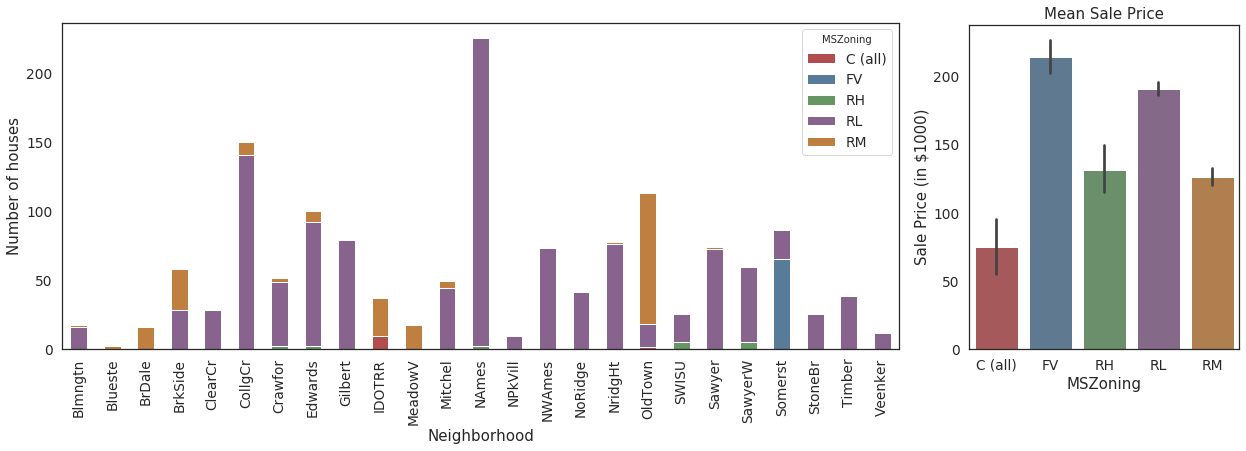

In [431]:
housing.groupby(['Neighborhood','MSZoning']).size().unstack('MSZoning').fillna(0).plot.bar(stacked=True,
                                                                                           color=sns.color_palette("Set1", n_colors=5, desat=.5),
                                                                                           figsize=(15,6))
plt.ylabel('Number of houses')
plt.axes([.965,0.125,0.25,0.75])
sns.barplot(x='MSZoning',y='SalePrice',
            data=housing,
            palette=sns.color_palette("Set1", n_colors=5, desat=.5),
            order=['C (all)','FV','RH','RL','RM'])
_=plt.yticks(ticks=np.arange(0,250000,50000),
           labels=[int(num) for num in np.arange(0,250000,50000)/1000])
_=plt.ylabel('Sale Price (in $1000)')
_=plt.title('Mean Sale Price')

Conclusion:
- Most houses are located in a **low density residential (RL)** zone across majority neighbohoods.
- In **Somerst**, most houses are located in the **floating village (FV)** residential zone. Note that houses in this zone also have the highest mean sale price.
- Only in **Iowa DOT and Rail Road (IDOTRR)** neighborhood do we find houses located in **commerial (C all)** zones. Note: these houses have the lowest mean sale price.
- Houses located in **floating village residential (FV)** zone are most expensive, whereas those locate in the **commercial** zones are cheapest.

### **Is the size of the house property influenced by zoning?**

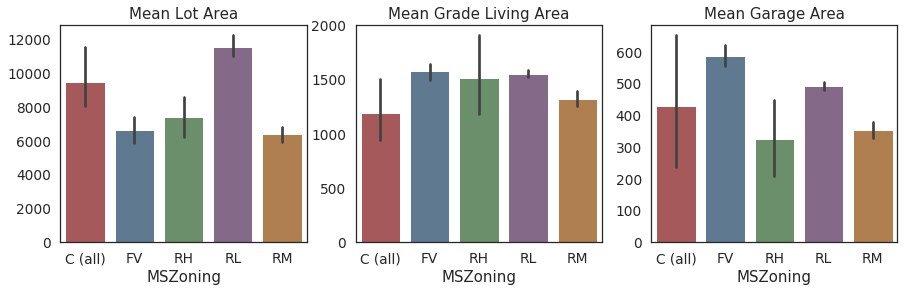

In [447]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.40)

plt.subplot(1,3,1)
sns.barplot(x='MSZoning',y='LotArea',
            data=housing,
            palette=sns.color_palette("Set1", n_colors=5, desat=.5),
            order=['C (all)','FV','RH','RL','RM'])
_=plt.ylabel('')
_=plt.title('Mean Lot Area')

plt.subplot(1,3,2)
sns.barplot(x='MSZoning',y='GrLivArea',
            data=housing,
            palette=sns.color_palette("Set1", n_colors=5, desat=.5),
            order=['C (all)','FV','RH','RL','RM'])
_=plt.ylabel('')
_=plt.title('Mean Grade Living Area')

plt.subplot(1,3,3)
sns.barplot(x='MSZoning',y='GarageArea',
            data=housing,
            palette=sns.color_palette("Set1", n_colors=5, desat=.5),
            order=['C (all)','FV','RH','RL','RM'])
_=plt.ylabel('')
_=plt.title('Mean Garage Area')

Conclusion:
- Houses in **low density residential (RL)** zones have the largest mean **Lot Area**. 
- Houses in **floating village residential (FV)** zone have the largest mean **Garage Area**.

### **What is the most commom building type for houses in Ames?**
### **What is the most common housing style for houses in Ames?**

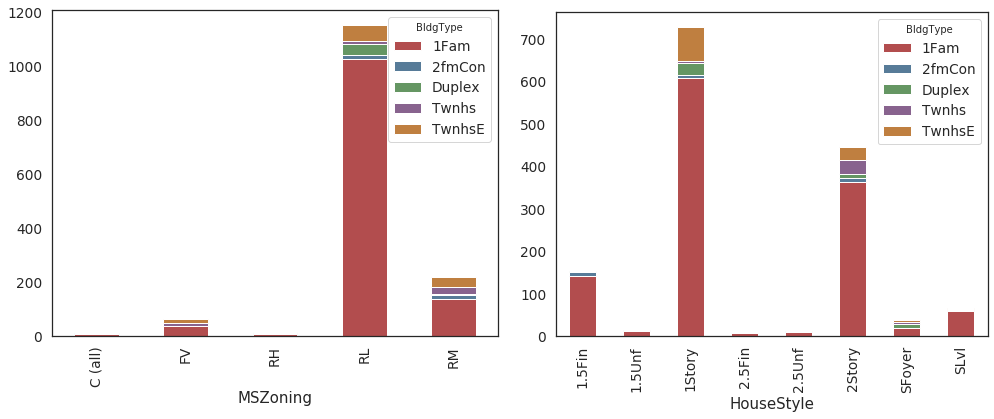

In [445]:
housing.groupby(['BldgType','MSZoning']).size().unstack('BldgType').fillna(0).plot.bar(stacked=True,
                                                                                           color=sns.color_palette("Set1", n_colors=5, desat=.5),
                                                                                           figsize=(8,6))
ax = plt.axes([1,0.125,0.75,0.75])
housing.groupby(['BldgType','HouseStyle']).size().unstack('BldgType').fillna(0).plot.bar(stacked=True,
                                                                                           color=sns.color_palette("Set1", n_colors=5, desat=.5),
                                                                                           figsize=(8,6),ax=ax)

Conclusion:

- **Single family detached (1Fam)** buiding type is most common. 
- **1 Story houses (1Story)** are most common.

### **Do houses close to certain important places cost different?**

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

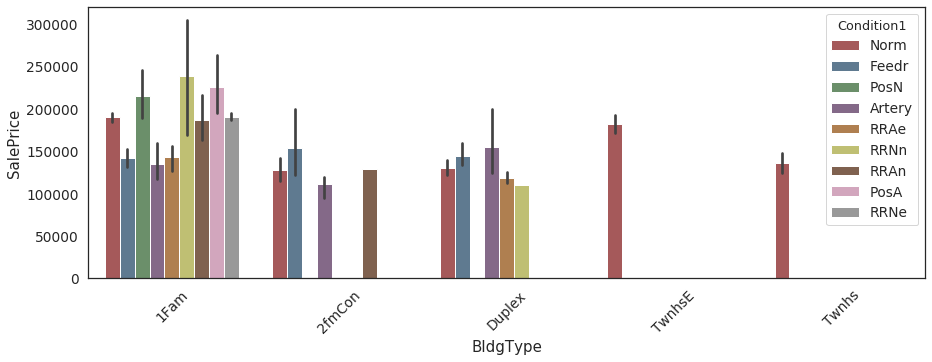

In [465]:
plt.figure(figsize=(15,5))
sns.barplot(x='BldgType',y='SalePrice',
            data=housing,
            hue='Condition1',
            palette=sns.color_palette("Set1", n_colors=9, desat=.5))
plt.xticks(rotation=45)

Conclusion:
- **Single family detached (1Fam)** houses that are within 200 feat of the North-South Railroad (**RRNn**) have the highest mean sale price**
    - followed by those that are adjacent to positive off-site feature (**PosA**).
    - followed by those that are near positive off-stie feature (**PosN**). 